<a href="https://colab.research.google.com/github/lisyaaprl/lisyaaprl.github.io/blob/main/project/Clustering_Dataset_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama:** Lisya Apriliani

---
**NIM:** 24060119120016

---
**Lab:** A2



##**I. Melakukan Clustering Menggunakan Dataset Iris**

**K-means clustering** merupakan salah satu contoh algoritma unsupervised learning yang berusaha mempartisi data yang ada ke dalam bentuk satu atau lebih cluster. Algoritma ini mempartisi data ke dalam cluster sehingga data yang memiliki karakteristik yang sama dikelompokkan ke dalam satu cluster yang sama dan data yang mempunyai karateristik yang berbeda di kelompokan ke dalam cluster yang lain.

####**1. Generate Dataset**

Untuk melakukan clustering menggunakan dataset iris, hal yang pertama yang dilakukan adalah *import* *library* yang diperlukan pada proses clustering, seperti numpy, matplotlib, mpl_toolkits, sklearn, dll. Lalu, set ukuran figure menjadi ukuran 16 x 9 dengan menggunakan plt.rcParams. 

---


Selanjutnya adalah melakukan generate dataset dengan load_iris karena dataset yang akan kita gunakan adalah dataset iris. Kemudian, dataset yang digenerate dikelompokkan menjadi 3 cluster. Dataset digenerate secara otomatis dari library sklearn.datasets. Dataset iris terdiri dari 150 samples dengan 50 samples di setiap clusternya.

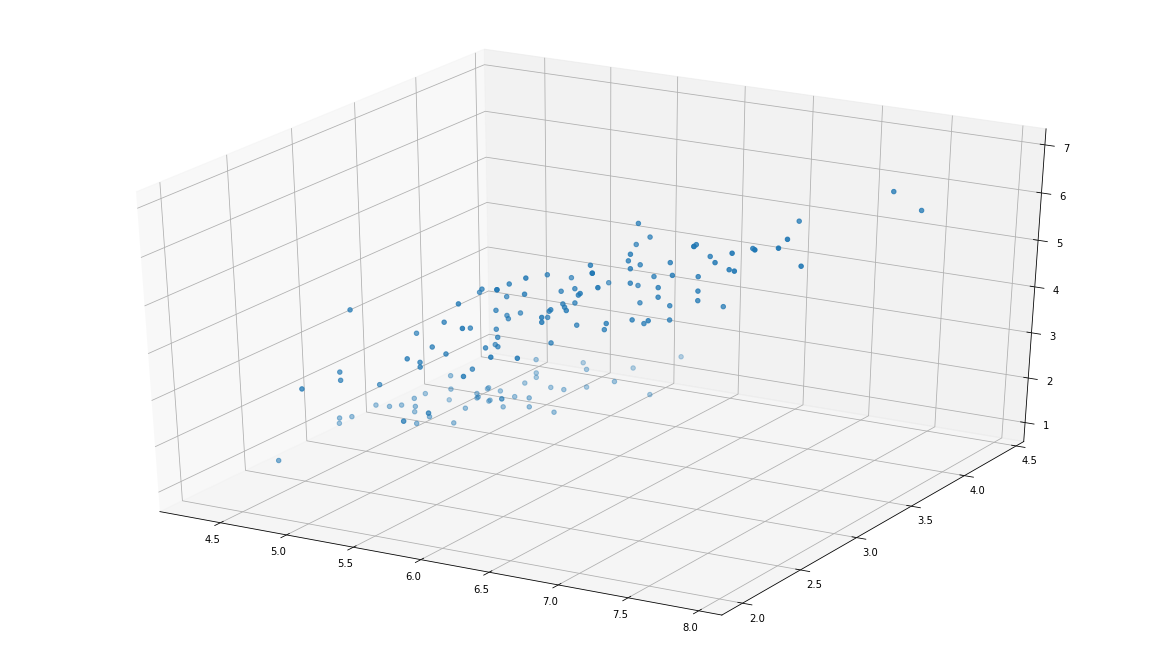

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
plt.rcParams['figure.figsize'] = (16, 9)

# Men-generate dataset yang terkelompok dalam 3 cluster
iris = load_iris()
X = iris.data
y = iris.target
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

####**2. Melakukan clustering**

Langkah berikutnya adalah melakukan clustering. Pertama - tama lakukan inisialisasi terlebih dahulu untuk KMeans dengan membuat variabel kmeans yang berisi KMeans dengan 3 clusters. Selanjutnya melakukan fitting dengan input, hasilnya disimpan pada variabel kmeans. Lalu, melakukan prediksi clusters menggunakan kmeans.predict(X) untuk memprediksi data akan dimasukkan ke cluster yang mana. Terakhir, mendapatkan cluster centers atau centroid untuk masing - masing cluster dengan kmeans.cluster_centers_, lalu hasilnya dimasukkan pada variabel C dan untuk menampilkannya gunakan print(C). Di bawah ini adalah centroid untuk masing - masing cluster pada dataset iris. Jumlah centroid disesuaikan dengan jumlah cluster, karena pada dataset iris jumlah cluster adalah 3, maka centroidnya ada 3.

In [ ]:
# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


####**3. Plot hasil clustering**

Langkah selanjutnya adalah melakukan plot untuk hasil clustering. Hasil clustering di-*plot* menggunakan figur 3D agar lebih terlihat dengan jelas. Plot dilakukan menggunakan scatter. Pada gambar di bawah ini ditampilkan hasil plot dari hasil clustering. Dapat terlihat bahwa setiap cluster ditandai dengan warna yang berbeda dan letak centroid ditandai dengan letak bintang pada titik tertentu di setiap cluster.

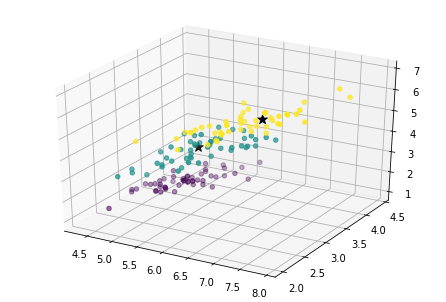

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=100)

##**II. Melakukan Evaluasi Hasil Clustering Dataset Iris**

**a. Evaluasi hasil cluster menggunakan inertia**

---

> Algoritma seperti k-Means tidak dapat menemukan nilai k-nya sendiri. Salah satu penyebabnya adalah sifat algoritma ini sebagai unsupervised learning. Jadi, nilai k biasanya merupakan masukan dari pengguna.

> Salah satu cara untuk menentukan k adalah dengan menggunakan jumlah kelas aslinya dan dapat dilakukan menggunakan elbow method dari scree plot. Untuk menghasilkan scree plot, perlu dihitung nilai total jarak antara tiap titik dengan centroid terdekatnya. Secara matematis, nilai yang juga dikenal sebagai **inertia.**

> Untuk mengevaluasi hasil clustering dengan inertia dapat dilakukan dengan langkah di bawah ini. Pertama membuat deklarasi variabel inertia_array. Lalu melakukan looping pada range 1 - 10. Selanjutnya menentukan jumlah cluster dengan KMeans, lalu fitting input data menggunakan kmeans.fit(X). Kemudian, mendapatkan cluster labels dengan menggunakan kmeans.predict(X), dan yang terakhir adalah melakukan perhitungan untuk menentukan jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE). Setelah melakukan print dan run code, maka akan dihasilkan hasil evaluasi seperti di bawah ini.








In [ ]:
inertia_array = []
for k in range (1, 10):
  # Menentukan jumlah cluster
  kmeans = KMeans(n_clusters=k, random_state=1)
  # Fitting input data
  kmeans = kmeans.fit(X)
  # Mendapatkan cluster labels
  labels = kmeans.predict(X)
  # Menghitung jumlahan jarak antara setiap sampel dengan cluster centroid-nya (SSE)
  inertia = kmeans.inertia_
  inertia_array.append((k,inertia))
  print("k{}, cost:{}".format(k, inertia))

k1, cost:681.3706
k2, cost:152.34795176035792
k3, cost:78.85144142614601
k4, cost:57.228473214285714
k5, cost:46.472230158730156
k6, cost:39.03998724608725
k7, cost:34.421674242424245
k8, cost:30.06459307359308
k9, cost:28.347370851370854



> Hasil evaluasi yaitu nilai k1 - k9 akan menghasilkan plot seperti pada gambar di bawah ini:


.

.

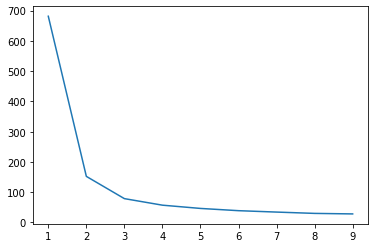

In [ ]:
k, inertia = zip(*inertia_array)
plt.plot(k, inertia)

 .

**b. Evaluasi hasil cluster menggunakan silhouette coefficient**

---

> Silhouette Coefficient digunakan untuk melihat kualitas dan kekuatan cluster, seberapa baik atau buruknya suatu obyek ditempatkan dalam suatu cluster. Metode ini merupakan gabungan dari metode separasi dan kohesi . Untuk menghitung nilai silhouette coefficient, diperlukan perhitungan nilai silhouette index dari sebuah data ke-i. Nilai silhouette coefficient didapatkan dengan mencari nilai maksimal dari nilai Silhouette Index Global dari jumlah cluster 2 sampai jumlah cluster n-1.

> Untuk melakukan evaluasi menggunakan silhoutte coefficition, maka harus import silhoutte_score dari library sklearn.metrics.cluster terlebih dahulu, kemudian lakukan evaluasi dengan memanggil silhoutte_score dengan parameter X, labels. Lalu, run code dan akan diperoleh hasil seperti hasil di bawah ini.




In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X, labels)

0.35691819487017074